<a href="https://colab.research.google.com/github/YanaAbakumova/Neural_networks/blob/lesson_2/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [ ]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, train_imagesi.shape[1]*train_imagesi.shape[2]))
test_images = test_imagesi.reshape((-1, test_imagesi.shape[1]*test_imagesi.shape[2]))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

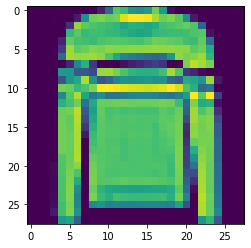

2


In [ ]:
plt.imshow(train_imagesi[5,:,:])
plt.show()
print(train_labels[5])


In [ ]:
def create_model(n_layers, n_neurons, n_epochs, bs, val_split, optim):

  model = Sequential(name='my_model')
  model.add(Dense( n_neurons, activation='relu', input_shape=(train_images.shape[1],)))  # входной слой
  for k in range(n_layers-2):
      model.add(Dense(  10+(10-k)*10, activation='tanh'))

  model.add(Dense(10, activation='softmax')) 
  # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

  model.compile(
  optimizer=optim, # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
  ) 
  
  # Train the model.
  hh = model.fit(train_images[:,:], y_t[:,:], epochs=n_epochs, batch_size=bs, validation_split=val_split)

  # Evaluate the model.
  model.evaluate(test_images, y_tt)

  return hh.history

  

#### Результат в нейросети в зависимости от числа нейронов в слое(для 2-хслойной сети):

Для тренировочного набора чем больше нейронов, тем меньше loss и выше accuracy. Что касается тестового набора - при нескольких запусках (ниже приведен только 1) лучшие результаты по loss в данном случае у среднего кол-ва нейронов - обычно 64, иногда 128. Accuracy на 64, 128 и 256 нейронов мало отличается. Оптимальным кажется кол-во нейронов 64

Epoch 1/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5876 - accuracy: 0.7895 - val_loss: 0.4779 - val_accuracy: 0.8289
Epoch 2/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4477 - accuracy: 0.8397 - val_loss: 0.4312 - val_accuracy: 0.8480
Epoch 3/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4167 - accuracy: 0.8535 - val_loss: 0.4383 - val_accuracy: 0.8457
Epoch 4/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3998 - accuracy: 0.8581 - val_loss: 0.4289 - val_accuracy: 0.8457
Epoch 5/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3862 - accuracy: 0.8626 - val_loss: 0.4128 - val_accuracy: 0.8527
Epoch 6/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3725 - accuracy: 0.8665 - val_loss: 0.3977 - val_accuracy: 0.8598
Epoch 7/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.8711 - val_loss: 0.3826 - val_accuracy:

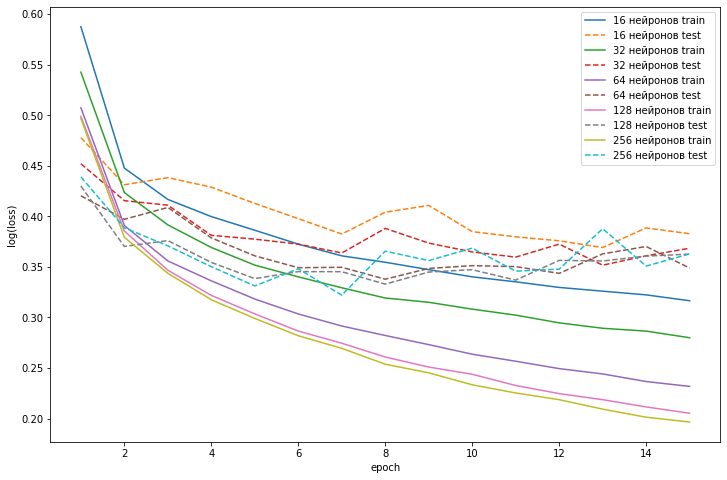

In [ ]:
info = {}
n_neurons = [16, 32, 64, 128, 256]
epochs = 15
for n in n_neurons:
  info[n] = create_model(n_layers=2, n_neurons=n, n_epochs=epochs, bs=32, val_split=0.2, optim ='adam')
plt.figure(figsize=(12, 8))
for key in info.keys():
  plt.plot(np.linspace(1, epochs, epochs), info[key]['loss'], '-', label=f'{key} нейронов train')
  plt.plot(np.linspace(1, epochs, epochs), info[key]['val_loss'], '--', label=f'{key} нейронов test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(loss)')

plt.show()



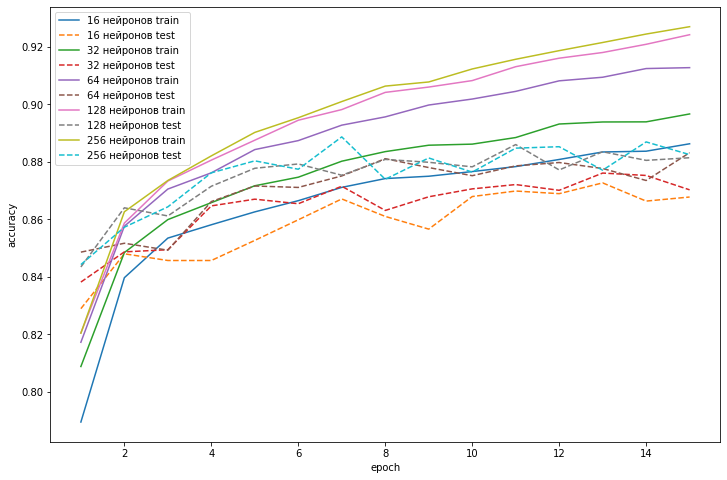

In [ ]:
plt.figure(figsize=(12, 8))
for key in info.keys():
  plt.plot(np.linspace(1, epochs, epochs), info[key]['accuracy'], '-', label=f'{key} нейронов train')
  plt.plot(np.linspace(1, epochs, epochs), info[key]['val_accuracy'], '--', label=f'{key} нейронов test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()


#### Результата в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

И на трейне, и на тесте лучшие результаты по loss и accuracy при нескольких перезапусках (ниже 1 из них) у модели с 3мя слоями

Epoch 1/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5135 - accuracy: 0.8138 - val_loss: 0.4213 - val_accuracy: 0.8465
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3942 - accuracy: 0.8563 - val_loss: 0.3788 - val_accuracy: 0.8634
Epoch 3/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3581 - accuracy: 0.8683 - val_loss: 0.3979 - val_accuracy: 0.8533
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3327 - accuracy: 0.8775 - val_loss: 0.3535 - val_accuracy: 0.8714
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8825 - val_loss: 0.3506 - val_accuracy: 0.8718
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2998 - accuracy: 0.8901 - val_loss: 0.3449 - val_accuracy: 0.8770
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2886 - accuracy: 0.8930 - val_loss: 0.3736 - val_accuracy:

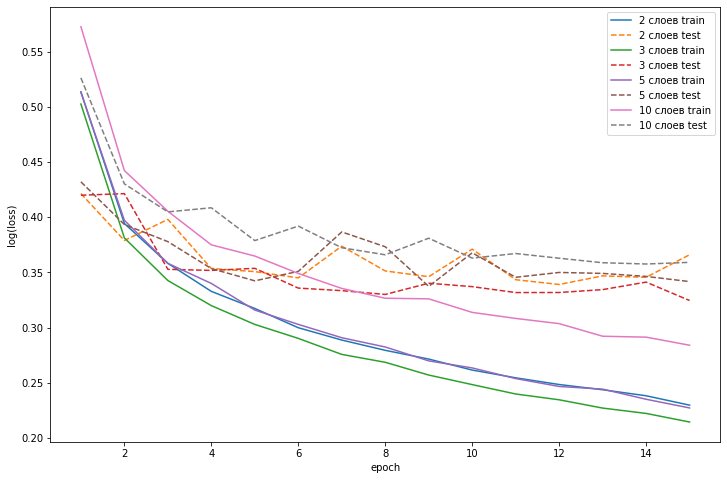

In [ ]:
info_layers = {}
n_layers = [2, 3, 5, 10]
epochs = 15
for n in n_layers:
  info_layers[n] = create_model(n_layers=n, n_neurons=64, n_epochs=epochs, bs=32, val_split=0.2, optim = 'adam')
plt.figure(figsize=(12, 8))
for key in info_layers.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['loss'], '-', label=f'{key} слоев train')
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['val_loss'], '--', label=f'{key} слоев test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(loss)')

plt.show()

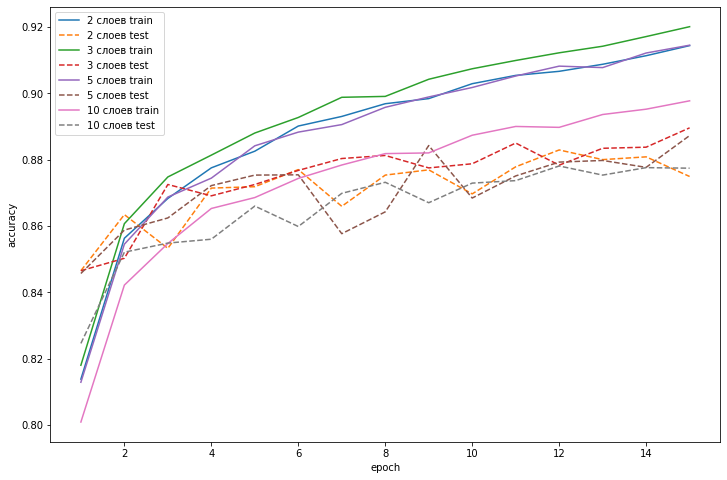

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_layers.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['accuracy'], '-', label=f'{key} слоев train')
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['val_accuracy'], '--', label=f'{key} слоев test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

#### Работа разных оптимизаторов:

На трейне по accuracy и минимальному loss лидирует NAdam, на тесте - RMSProp. Хуже всего результат на тесте у оптимизатора SGD.

Epoch 1/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6588 - accuracy: 0.7749 - val_loss: 0.4948 - val_accuracy: 0.8205
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4556 - accuracy: 0.8391 - val_loss: 0.4388 - val_accuracy: 0.8393
Epoch 3/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4135 - accuracy: 0.8532 - val_loss: 0.4230 - val_accuracy: 0.8446
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3886 - accuracy: 0.8619 - val_loss: 0.3925 - val_accuracy: 0.8596
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3697 - accuracy: 0.8675 - val_loss: 0.3829 - val_accuracy: 0.8654
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3572 - accuracy: 0.8726 - val_loss: 0.3744 - val_accuracy: 0.8664
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3449 - accuracy: 0.8754 - val_loss: 0.3629 - val_accuracy:

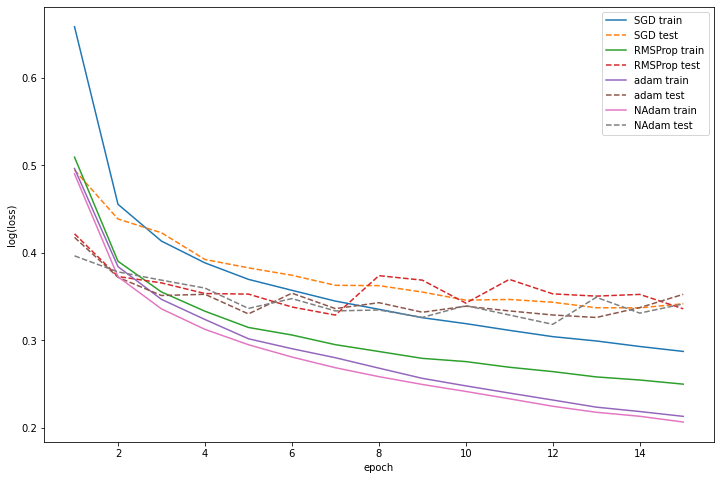

In [ ]:
info_optims = {}
optims = ['SGD','RMSProp','adam','NAdam']
epochs = 15
for n in optims:
  info_optims[n] = create_model(n_layers=3, n_neurons=64, n_epochs=epochs, bs=32, val_split=0.2, optim = n)
plt.figure(figsize=(12, 8))
for key in info_optims.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_optims[key]['loss'], '-', label=f'{key} train')
  plt.plot(np.linspace(1, epochs, epochs), info_optims[key]['val_loss'], '--', label=f'{key} test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(loss)')

plt.show()

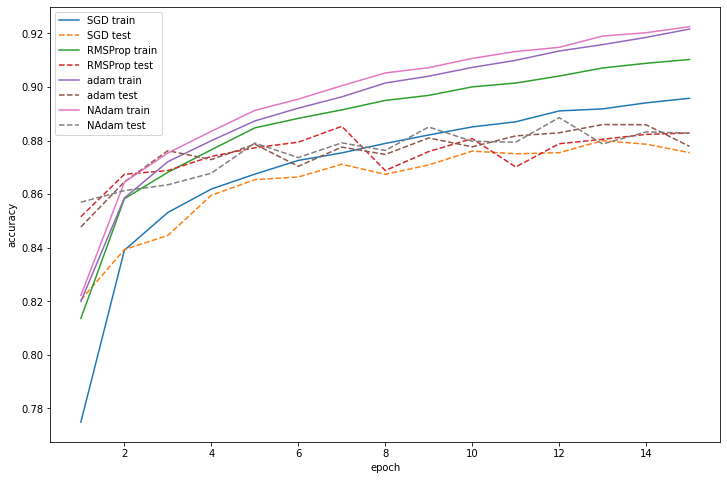

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_optims.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_optims[key]['accuracy'], '-', label=f'{key} train')
  plt.plot(np.linspace(1, epochs, epochs), info_optims[key]['val_accuracy'], '--', label=f'{key} test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

#### Подбор epochs и batch_size

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5119 - accuracy: 0.8143 - val_loss: 0.4670 - val_accuracy: 0.8274
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3899 - accuracy: 0.8566 - val_loss: 0.3867 - val_accuracy: 0.8568
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3558 - accuracy: 0.8695 - val_loss: 0.3764 - val_accuracy: 0.8656
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8774 - val_loss: 0.3889 - val_accuracy: 0.8581
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8845 - val_loss: 0.3397 - val_accuracy: 0.8811
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3065 - accuracy: 0.8865 - val_loss: 0.3539 - val_accuracy: 0.8742
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2985 - accuracy: 0.8907 - val_loss: 0.3449 - val_accuracy:

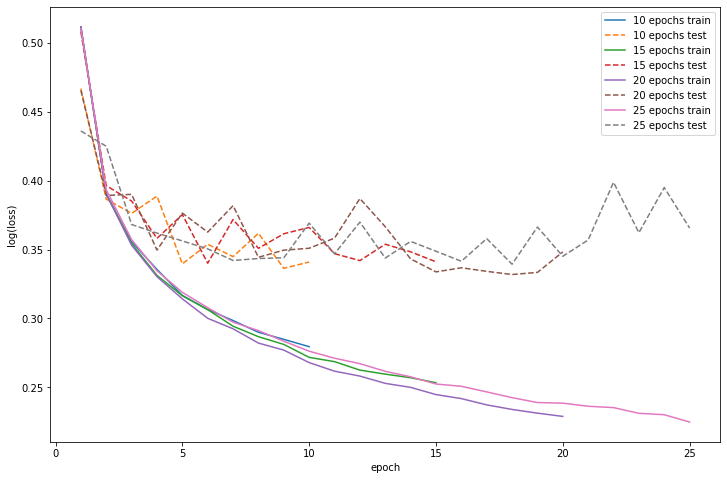

In [ ]:
info_epochs = {}
n_epochs = [10,15, 20, 25]
for n in n_epochs:
  info_epochs[n] = create_model(n_layers=3, n_neurons=64, n_epochs=n, bs=32, val_split=0.2, optim = 'RMSProp')
plt.figure(figsize=(12, 8))
for key in info_epochs.keys():
  plt.plot(np.linspace(1, key, key), info_epochs[key]['loss'], '-', label=f'{key} epochs train')
  plt.plot(np.linspace(1, key, key), info_epochs[key]['val_loss'], '--', label=f'{key} epochs test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(loss)')

plt.show()

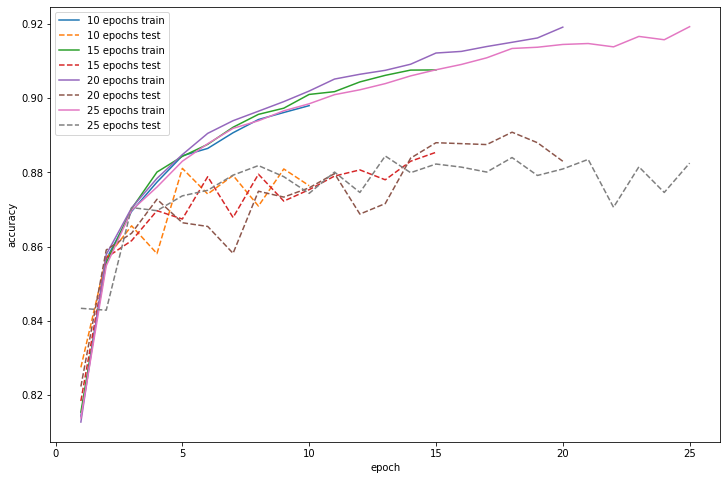

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_epochs.keys():
  plt.plot(np.linspace(1, key, key), info_epochs[key]['accuracy'], '-', label=f'{key} epochs train')
  plt.plot(np.linspace(1, key, key), info_epochs[key]['val_accuracy'], '--', label=f'{key} epochs test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

Epoch 1/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5081 - accuracy: 0.8139 - val_loss: 0.4175 - val_accuracy: 0.8468
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3903 - accuracy: 0.8576 - val_loss: 0.3829 - val_accuracy: 0.8636
Epoch 3/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3546 - accuracy: 0.8701 - val_loss: 0.3727 - val_accuracy: 0.8680
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3338 - accuracy: 0.8772 - val_loss: 0.3566 - val_accuracy: 0.8708
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3199 - accuracy: 0.8835 - val_loss: 0.3406 - val_accuracy: 0.8772
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3068 - accuracy: 0.8884 - val_loss: 0.3559 - val_accuracy: 0.8758
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8918 - val_loss: 0.3569 - val_accuracy:

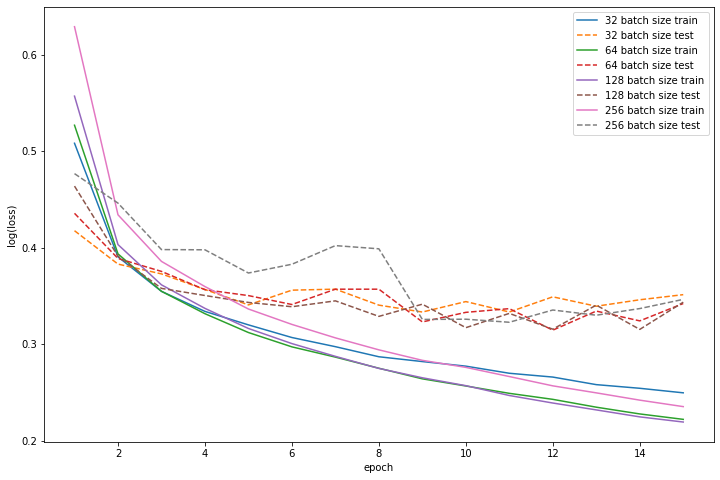

In [ ]:
info_bs = {}
bs = [32,64, 128, 256]
epochs=15
for n in bs:
  info_bs[n] = create_model(n_layers=3, n_neurons=64, n_epochs=15, bs=n, val_split=0.2, optim = 'RMSProp')
plt.figure(figsize=(12, 8))
for key in info_bs.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_bs[key]['loss'], '-', label=f'{key} batch size train')
  plt.plot(np.linspace(1, epochs, epochs), info_bs[key]['val_loss'], '--', label=f'{key} batch size test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(loss)')

plt.show()

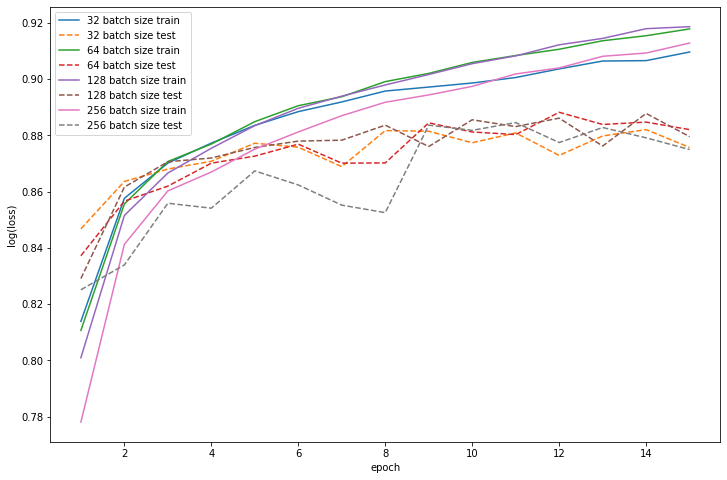

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_bs.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_bs[key]['accuracy'], '-', label=f'{key} batch size train')
  plt.plot(np.linspace(1, epochs, epochs), info_bs[key]['val_accuracy'], '--', label=f'{key} batch size test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(loss)')

plt.show()

Качество модели на тесте помогает улучшить подбор таких параметров, как:
- Кол-во нейронов (я выбрала 64)
- Кол-во слоев (я выбрала 3)
- Оптимизатор (RMSProp)
- Кол-во эпох (15)
- Batch size (64)

Возможно, если проводить gridsearch, лучшее сочетание параметров было бы другим

#### Матрица ошибок

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
model = Sequential(name='my_model')
model.add(Dense( 64, activation='relu', input_shape=(train_images.shape[1],)))  # входной слой
for k in range(1):
    model.add(Dense(  10+(10-k)*10, activation='tanh'))
model.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

model.compile(
optimizer='RMSProp', # оптимизатор
loss=keras.losses.CategoricalCrossentropy(), # функция потерь
metrics=['accuracy'], # метрика
) 
  
# Train the model.
model.fit(train_images[:,:], y_t[:,:], epochs=15, batch_size=64, validation_split=0.2)


Epoch 1/15
750/750 [==============================] - 3s 3ms/step - loss: 0.5241 - accuracy: 0.8093 - val_loss: 0.4289 - val_accuracy: 0.8394
Epoch 2/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3927 - accuracy: 0.8547 - val_loss: 0.3855 - val_accuracy: 0.8637
Epoch 3/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3534 - accuracy: 0.8692 - val_loss: 0.3982 - val_accuracy: 0.8523
Epoch 4/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3301 - accuracy: 0.8763 - val_loss: 0.3610 - val_accuracy: 0.8710
Epoch 5/15
750/750 [==============================] - 2s 3ms/step - loss: 0.3100 - accuracy: 0.8856 - val_loss: 0.3453 - val_accuracy: 0.8746
Epoch 6/15
750/750 [==============================] - 2s 3ms/step - loss: 0.2952 - accuracy: 0.8904 - val_loss: 0.3430 - val_accuracy: 0.8807
Epoch 7/15
750/750 [==============================] - 2s 3ms/step - loss: 0.2823 - accuracy: 0.8966 - val_loss: 0.3493 - val_accuracy: 0.8767
Epoch 

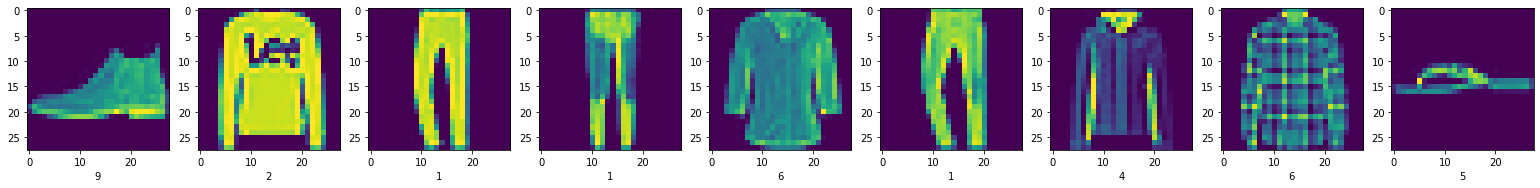

In [ ]:
N = 9
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [ ]:
y_pred_class[:9]

array([9, 2, 1, 1, 6, 1, 4, 6, 5])

In [ ]:
y_true_class = np.argmax(y_tt,axis=1)
print(confusion_matrix(y_true_class, y_pred_class))

[[790   4  13  18   5   5 158   0   7   0]
 [  2 972   0  18   6   0   1   0   1   0]
 [ 14   2 730  10 149   1  91   1   2   0]
 [ 25   8  12 850  64   0  39   0   2   0]
 [  1   0  57  14 866   0  61   0   1   0]
 [  0   0   0   1   0 972   0  13   1  13]
 [101   1  53  20  71   1 741   0  12   0]
 [  0   0   0   0   0  39   0 932   0  29]
 [  7   1   3   3   4   7  10   5 960   0]
 [  0   0   0   0   0  13   1  27   0 959]]


In [ ]:
print(classification_report(y_true_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.84      0.73      0.78      1000
           3       0.91      0.85      0.88      1000
           4       0.74      0.87      0.80      1000
           5       0.94      0.97      0.95      1000
           6       0.67      0.74      0.71      1000
           7       0.95      0.93      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Модель неплохо справилась с заданием, precision, recall, f1 по всем классам довольно высокие. Хуже всего модель распознает класс № 6 (в этом случае чаще всего путает с классом 0)